# Average Directional Movement Index (ADMI)

FF-15	Average Directional Movement Index (ADMI)

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 

Average Directional Movement Index  
Average Directional Movement Index Technical Indicator (ADX) helps to determine if there is a price trend. It was developed and described in detail by Welles Wilder in his book "New concepts in technical trading systems".  

The simplest trading method based on the system of directional movement implies comparison of two direction indicators: the 14-period +DI one and the 14-period -DI. To do this, one either puts the charts of indicators one on top of the other, or +DI is subtracted from -DI. W. Wilder recommends buying when +DI is higher than -DI, and selling when +DI sinks lower than -DI.  
https://www.metatrader5.com/en/terminal/help/indicators/trend_indicators/admi

ADX = SUM ((+DI - (-DI)) / (+DI + (-DI)), N) / N

Where:  
N — the number of periods used in the calculation;  
SUM (..., N) — sum for N periods;  
+DI — value of the indicator of the positive price movement (positive directional index);  
-DI — value of the indicator of the negative price movement (negative directional index).  

https://www.investopedia.com/articles/trading/07/adx-trend-indicator.asp

https://www.dolphintrader.com/forex-trading-strategies-with-admi-average-directional-movement-index/

```
ADX - Average Directional Movement Index
NOTE: The ADX function has an unstable period.

real = ADX(high, low, close, timeperiod=14)
```  
https://mrjbq7.github.io/ta-lib/func_groups/momentum_indicators.html


Both ta-lib and ta has functions implemented. trend_adx and ADX.

In [2]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

# 1. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# 2. https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
pd.options.mode.chained_assignment = None # Suppress warning

# Load Data Series from Dataset

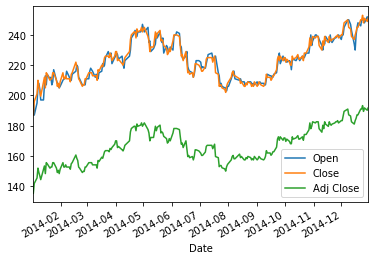

In [3]:
DATA_HOME = os.path.join("..","..","dataset","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily[['Open','Close','Adj Close']].plot()

In [6]:

from ta import add_all_ta_features
from ta.utils import dropna

inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}
# Note the use of Close instead of Adj Close.

cci = CCI(inputs)
adx = ADX(inputs)

daily = add_all_ta_features(daily, open="Open", high="High", low="Low", close="Close", volume="Volume")

slowk, slowd = STOCH(inputs, fastk_period=10, prices=['high', 'low', 'close']) # No need for period.!! Check out the C documentation.

daily.loc[:,("CCI")] = cci.tolist()
daily.loc[:,("ADX")] = adx.tolist()
daily.loc[:,("Stoch-K")] = slowk.tolist()
daily.loc[:,("Stoch-D")] = slowd.tolist()
daily.tail()



,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,CCI,adx,Stoch-K,Stoch-D,ADX
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-24,253.0,249.0,250.0,253.0,3076400.0,193.273026,-5.005559e+06,213623400.0,0.222698,6.340093e+06,...,11.660023,-7.650647,1.200000,1.192857,35.294118,109.189189,22.794303,93.217893,88.051948,22.794303
2014-12-25,252.0,246.0,251.0,248.0,1773800.0,189.453384,-5.596826e+06,211849600.0,0.194908,4.167365e+06,...,8.821538,-11.353940,-1.976285,-1.996074,32.620321,55.888224,21.266226,89.523810,89.947090,21.266226
2014-12-26,251.0,246.0,248.0,251.0,2452700.0,191.745163,-3.144126e+06,214302300.0,0.206448,4.623184e+06,...,5.608505,-12.852132,1.209677,1.202419,34.224599,62.518302,19.847298,90.476190,91.072631,19.847298
2014-12-29,253.0,248.0,252.0,249.0,2282500.0,190.217331,-4.513626e+06,212019800.0,0.188726,3.310587e+06,...,2.184377,-13.696512,-0.796813,-0.800004,33.155080,72.083943,18.696203,85.255732,88.418577,18.696203
2014-12-30,252.0,247.0,249.0,251.0,2302600.0,191.745163,-3.132066e+06,214322400.0,0.217800,3.495531e+06,...,-1.269423,-13.815199,0.803213,0.800004,34.224599,66.384977,17.430720,83.827160,86.519694,17.430720


# Plot of ADX on the original time-series

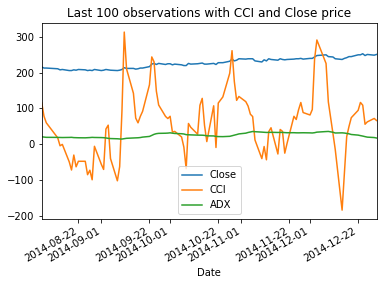

In [8]:
daily[['Close','CCI', 'ADX']][-100:].plot(title="Last 100 observations with CCI and Close price")

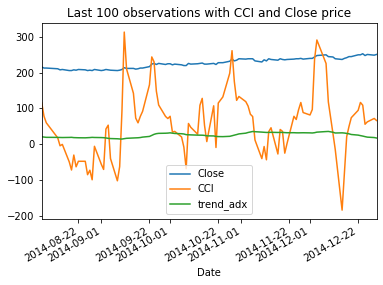

In [9]:
daily[['Close','CCI', 'trend_adx']][-100:].plot(title="Last 100 observations with CCI and Close price")

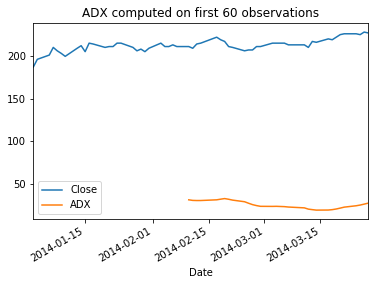

In [13]:
daily[['Close','ADX']][:60].plot(title="ADX computed on first 60 observations")

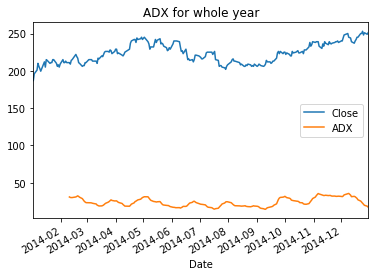

In [14]:
daily[['Close','ADX']].plot(title="ADX for whole year")

In [9]:
daily.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
     

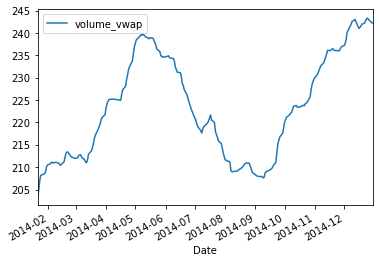

In [12]:
daily[['volume_vwap']].dropna().plot()

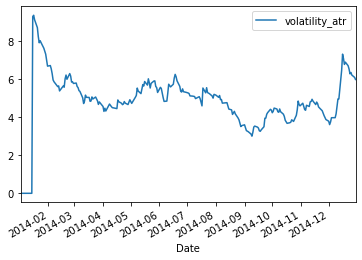

In [10]:
daily[['volatility_atr']].dropna().plot()

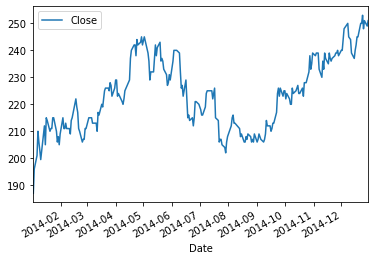

In [11]:
daily[['Close']].dropna().plot()